### 0. Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

### 1. Parameters

In [2]:
# Stock to predict
company = "VOO"
# What do we want to predict? High, Low, Open, or Close price?
target_variable = 'Low'


# How many days do we want to look back to predict prices? (Only weekdays)
# Take 10% of training data (2012 rows)
prediction_days = 50

# Retrieve Training Data (Take the first 8 years as training data)
# 2012 rows of data
train_start = dt.datetime(2012,1,1)
train_end = dt.datetime(2020,1,1)

# Retrieve Testing Data (Take the last 2.3 years as testing data)
test_start = dt.datetime(2020,1,1)
test_end = dt.datetime(2022,3,8)

### Retrieve Training Data

In [3]:
training_data = web.DataReader(company, 'yahoo', train_start, train_end)

In [4]:
training_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,117.459999,116.599998,116.900002,116.599998,163250.0,96.554108
2012-01-04,116.919998,115.959999,116.440002,116.800003,448450.0,96.719757
2012-01-05,117.300003,115.680000,116.279999,117.180000,253500.0,97.034416
2012-01-06,117.300003,116.480003,117.300003,116.940002,166900.0,96.835693
2012-01-09,117.239998,116.540001,117.139999,117.120003,177000.0,96.984741
...,...,...,...,...,...,...
2019-12-24,295.399994,294.850006,295.359985,295.160004,1305900.0,285.852386
2019-12-26,296.690002,295.519989,295.559998,296.670013,2390300.0,287.314758
2019-12-27,297.510010,296.149994,297.510010,296.670013,2225400.0,287.314758


### Rescale and Convert Training Data into NN Shape

In [5]:
# Rescale stock prices into 0-1 scales
scaler = MinMaxScaler(feature_range=(0,1))
# What do we want to predict? High, Low, Open, Close
scaled_data = scaler.fit_transform(training_data[target_variable].values.reshape(-1,1))

In [6]:
x_train = []
y_train = []

# Splice x_train and y_train data based on "prediction_days"
for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x,0])
    
# Convert list into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape x_train so that it works in a neural network
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Trying different Models

In [ ]:
# Changed dropout from 0.2 to 0.1 (Very Bad)
# model2 = Sequential()

# model2.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model2.add(Dropout(0.1))
# model2.add(LSTM(units=50, return_sequences = True))
# model2.add(Dropout(0.1))
# model2.add(LSTM(units=50))
# model2.add(Dropout(0.1))
# model2.add(Dense(units = 1))

# model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# model2.fit(x_train, y_train, epochs = 25, batch_size = 32)

In [ ]:
# Added Additional LSTM and Dropout Layer (Very good results)
# model3 = Sequential()

# model3.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model3.add(Dropout(0.2))
# model3.add(LSTM(units=50, return_sequences = True))
# model3.add(Dropout(0.2))
# model3.add(LSTM(units=50, return_sequences = True))
# model3.add(Dropout(0.2))
# model3.add(LSTM(units=50))
# model3.add(Dropout(0.2))
# model3.add(Dense(units = 1))

# model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# model3.fit(x_train, y_train, epochs = 25, batch_size = 32)

In [ ]:
# Added Additional LSTM and Dropout Layer (Very Good) Dont add anymore
# Increased epochs form 25 to 50 (Very Good)
# model5 = Sequential()

# model5.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model5.add(Dropout(0.2))
# model5.add(LSTM(units=50, return_sequences = True))
# model5.add(Dropout(0.2))
# model5.add(LSTM(units=50, return_sequences = True))
# model5.add(Dropout(0.2))
# model5.add(LSTM(units=50))
# model5.add(Dropout(0.2))
# model5.add(Dense(units = 1))

# model5.compile(optimizer = 'adam', loss = 'mean_squared_error')

# model5.fit(x_train, y_train, epochs = 50, batch_size = 32)

In [7]:
# Added Additional LSTM and Dropout Layer (Very Good) Dont add anymore
# Increased epochs form 50 to 100 to 150 to 200
model6_low = Sequential()

model6_low.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model6_low.add(Dropout(0.2))
model6_low.add(LSTM(units=50, return_sequences = True))
model6_low.add(Dropout(0.2))
model6_low.add(LSTM(units=50, return_sequences = True))
model6_low.add(Dropout(0.2))
model6_low.add(LSTM(units=50))
model6_low.add(Dropout(0.2))
model6_low.add(Dense(units = 1))

model6_low.compile(optimizer = 'adam', loss = 'mean_squared_error')

model6_low.fit(x_train, y_train, epochs = 200, batch_size = 32)

Epoch 1/200
62/62 [==============================] - 9s 63ms/step - loss: 0.0301
Epoch 2/200
62/62 [==============================] - 4s 62ms/step - loss: 0.0041
Epoch 3/200
62/62 [==============================] - 4s 60ms/step - loss: 0.0036
Epoch 4/200
62/62 [==============================] - 4s 60ms/step - loss: 0.0033
Epoch 5/200
62/62 [==============================] - 4s 63ms/step - loss: 0.0029
Epoch 6/200
62/62 [==============================] - 4s 63ms/step - loss: 0.0030
Epoch 7/200
62/62 [==============================] - 4s 64ms/step - loss: 0.0028
Epoch 8/200
62/62 [==============================] - 4s 69ms/step - loss: 0.0032
Epoch 9/200
62/62 [==============================] - 4s 71ms/step - loss: 0.0027
Epoch 10/200
62/62 [==============================] - 4s 72ms/step - loss: 0.0024
Epoch 11/200
62/62 [==============================] - 5s 76ms/step - loss: 0.0025
Epoch 12/200
62/62 [==============================] - 5s 74ms/step - loss: 0.0023
Epoch 13/200
62/62 [=====

62/62 [==============================] - 5s 76ms/step - loss: 8.8025e-04
Epoch 100/200
62/62 [==============================] - 5s 81ms/step - loss: 8.3774e-04
Epoch 101/200
62/62 [==============================] - 5s 77ms/step - loss: 9.1213e-04
Epoch 102/200
62/62 [==============================] - 5s 78ms/step - loss: 7.7966e-04
Epoch 103/200
62/62 [==============================] - 5s 78ms/step - loss: 8.5128e-04
Epoch 104/200
62/62 [==============================] - 5s 77ms/step - loss: 7.6119e-04
Epoch 105/200
62/62 [==============================] - 5s 77ms/step - loss: 7.3777e-04
Epoch 106/200
62/62 [==============================] - 5s 77ms/step - loss: 7.3527e-04
Epoch 107/200
62/62 [==============================] - 6s 92ms/step - loss: 7.4795e-04
Epoch 108/200
62/62 [==============================] - 5s 79ms/step - loss: 8.5830e-04
Epoch 109/200
62/62 [==============================] - 5s 77ms/step - loss: 7.2343e-04
Epoch 110/200
62/62 [==============================] - 5s

62/62 [==============================] - 4s 72ms/step - loss: 6.3901e-04
Epoch 194/200
62/62 [==============================] - 4s 71ms/step - loss: 5.9326e-04
Epoch 195/200
62/62 [==============================] - 5s 74ms/step - loss: 6.8369e-04
Epoch 196/200
62/62 [==============================] - 4s 72ms/step - loss: 6.1440e-04
Epoch 197/200
62/62 [==============================] - 5s 74ms/step - loss: 6.5575e-04
Epoch 198/200
62/62 [==============================] - 4s 72ms/step - loss: 7.2904e-04
Epoch 199/200
62/62 [==============================] - 4s 70ms/step - loss: 6.9617e-04
Epoch 200/200
62/62 [==============================] - 4s 71ms/step - loss: 6.0608e-04


In [ ]:
# Added Additional LSTM and Dropout Layer (Very Good) Dont add anymore
# Increased epochs form 50 to 100
# Set metric to aacuracy (Very Bad)
# model6_low_acc = Sequential()

# model6_low_acc.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model6_low_acc.add(Dropout(0.2))
# model6_low_acc.add(LSTM(units=50, return_sequences = True))
# model6_low_acc.add(Dropout(0.2))
# model6_low_acc.add(LSTM(units=50, return_sequences = True))
# model6_low_acc.add(Dropout(0.2))
# model6_low_acc.add(LSTM(units=50))
# model6_low_acc.add(Dropout(0.2))
# model6_low_acc.add(Dense(units = 1))

# model6_low_acc.compile(optimizer = 'adam',
#                        loss = 'mean_squared_error',
#                        metrics = ['accuracy'])

# model6_low_acc.fit(x_train, y_train, epochs = 150, batch_size = 32)

In [ ]:
# Added Additional x2 LSTM and Dropout Layer (Very bad)
# model4 = Sequential()

# model4.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model4.add(Dropout(0.2))
# model4.add(LSTM(units=50, return_sequences = True))
# model4.add(Dropout(0.2))
# model4.add(LSTM(units=50, return_sequences = True))
# model4.add(Dropout(0.2))
# model4.add(LSTM(units=50, return_sequences = True))
# model4.add(Dropout(0.2))
# model4.add(LSTM(units=50))
# model4.add(Dropout(0.2))
# model4.add(Dense(units = 1))

# model4.compile(optimizer = 'adam', loss = 'mean_squared_error')

# model4.fit(x_train, y_train, epochs = 25, batch_size = 32)

In [ ]:
# model = Sequential()

# Using too many layers means overfitting
# units = experimenting value. Can change later
# return_sequence = LSTM is a RNN so it's going to feed back the information
# input_shape = prediction_days (256)
# model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# Prediction of the next stock price
# model.add(Dense(units = 1))

# optimizer = usually adam
# loss = loss function

# model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# epoch = how many times the model will see the data
# batch_size = how many data to see each time
# model.fit(x_train, y_train, epochs = 25, batch_size = 32)

### Test Model Accuracy

In [8]:
test_data = web.DataReader(company, 'yahoo', test_start, test_end)

In [9]:
test_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,295.989990,294.170013,294.529999,295.799988,2512700.0,286.472198
2020-01-02,298.450012,296.339996,297.290009,298.420013,3142400.0,289.009583
2020-01-03,297.359985,295.040009,295.220001,296.239990,3247900.0,286.898346
2020-01-06,297.420013,294.350006,294.420013,297.350006,2777100.0,287.973328
2020-01-07,297.269989,296.059998,296.820007,296.529999,2251800.0,287.179199
...,...,...,...,...,...,...
2022-03-02,404.100006,396.779999,397.720001,402.600006,8185200.0,402.600006
2022-03-03,405.540009,398.880005,405.019989,400.579987,8745300.0,400.579987
2022-03-04,398.429993,393.369995,396.929993,397.339996,6317700.0,397.339996


In [10]:
# Get actual stock price
actual_prices = test_data[target_variable].values

df = pd.concat((training_data[target_variable], test_data[target_variable]), axis = 0)

In [11]:
model_inputs = df[len(df) - len(test_data) - prediction_days:].values # shape = (600,0)

In [12]:
model_inputs.shape

(601,)

In [13]:
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

### Make Predictions on Test Data

In [14]:
x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

In [15]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [16]:
# Predict based on x_test data
predicted_prices = model6_low.predict(x_test)
# Since the predicted prices would be scaled, we need to reverse scale them into actual stock prices
predicted_prices = scaler.inverse_transform(predicted_prices)

### Visualize

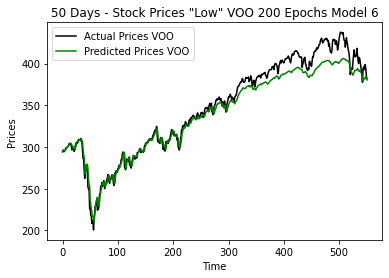

In [17]:
# Plot the Test Predictions
plt.plot(actual_prices, color = 'black', label = f'Actual Prices {company}')
plt.plot(predicted_prices, color = 'green', label = f'Predicted Prices {company}')
plt.title(f'50 Days - Stock Prices "Low" {company} 200 Epochs Model 6')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend()
plt.show()

### Predict Next Day

In [18]:
# model_inputs = 600 data points
# real_data = 49 data points
#                          model_inputs[600 + 1 - 50:601, 0]
# real_data = last "prediction_days" - 1 data points on "test_data"
real_data = [model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [21]:
prediction = model6_low.predict(real_data)
print(prediction)
prediction = scaler.inverse_transform(prediction)
print('Stock price the day after', test_end, ' : ', prediction)

[[1.4544909]]
Stock price the day after 2022-03-08 00:00:00  :  [[378.17194]]


### Experimenting

In [ ]:
# model_inputs = 600 data points
# real_data = 49 data points
#                          model_inputs[600 + 1 - 50:601, 0]
#real_data = [model_inputs[:, 0]]
#real_data = np.array(real_data)
#real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

In [ ]:
#prediction = model.predict(real_data)
#prediction = scaler.inverse_transform(prediction)
#print(f'Prediction: {prediction}')